## Обучение без учителя

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

## Задание 1

### Загрузка набора данных

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = pd.DataFrame(raw_df.values[1::2, 2], columns=['price'])
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = data.copy()
y = target.copy()

### Разбиение данных на тренировочный и тестовый наборы

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2)

### Масштабирование данных

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


### Понижение размерности данных до 2 измерений

In [6]:
X_embedded = TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(X_train_scaled)

<Axes: >

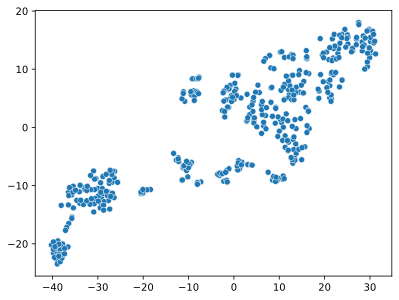

In [7]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1])

### Задание 2

### Разбиение данных на 3 кластера

In [8]:
model_kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
model_kmeans.fit(X_train_scaled)
kmeans_labels_train = model_kmeans.predict(X_train_scaled)

<Axes: >

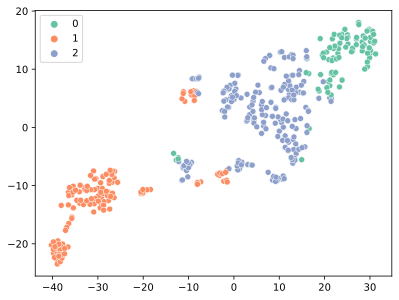

In [9]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=kmeans_labels_train, palette='Set2')

In [10]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [11]:
for cluster_number in np.unique(kmeans_labels_train):
    print(f"Для тренировочных данных среднее значение признака 'CRIME' в кластере {cluster_number} равно: {round(X_train['CRIM'][kmeans_labels_train == cluster_number].mean(), 2)}")

Для тренировочных данных среднее значение признака 'CRIME' в кластере 0 равно: 0.07
Для тренировочных данных среднее значение признака 'CRIME' в кластере 1 равно: 10.8
Для тренировочных данных среднее значение признака 'CRIME' в кластере 2 равно: 0.42


In [12]:
for cluster_number in np.unique(kmeans_labels_train):
    print(f"Для тренировочных данных среднее значение признака 'price' в кластере {cluster_number} равно: {round(y_train[kmeans_labels_train == cluster_number]['price'].mean(), 2)}")

Для тренировочных данных среднее значение признака 'price' в кластере 0 равно: 27.79
Для тренировочных данных среднее значение признака 'price' в кластере 1 равно: 16.17
Для тренировочных данных среднее значение признака 'price' в кластере 2 равно: 24.96


### *Задание 3

In [13]:
kmean_labels_test = model_kmeans.predict(X_test_scaled)

In [14]:
X_test_embedded = TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(X_test_scaled)

<Axes: >

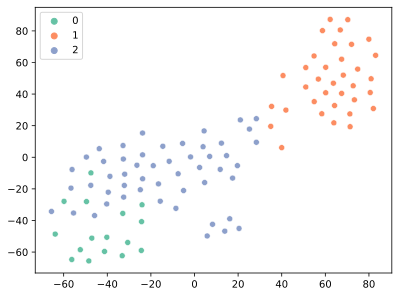

In [15]:
sns.scatterplot(x=X_test_embedded[:, 0], y=X_test_embedded[:, 1], hue=kmean_labels_test, palette='Set2')

In [16]:
for cluster_number in np.unique(kmean_labels_test):
    print(f"Для тестовых данных среднее значение признака 'CRIME' в кластере {cluster_number} равно : {round(X_test['CRIM'][kmean_labels_test == cluster_number].mean(), 2)}")

Для тестовых данных среднее значение признака 'CRIME' в кластере 0 равно : 0.06
Для тестовых данных среднее значение признака 'CRIME' в кластере 1 равно : 10.17
Для тестовых данных среднее значение признака 'CRIME' в кластере 2 равно : 0.27


In [17]:
for cluster_number in np.unique(kmean_labels_test):
    print(f"Для тестовых данных среднее значение признака 'price' в кластере {cluster_number} равно: {round(y_test[kmean_labels_test == cluster_number]['price'].mean(), 2)}")

Для тестовых данных среднее значение признака 'price' в кластере 0 равно: 31.35
Для тестовых данных среднее значение признака 'price' в кластере 1 равно: 16.44
Для тестовых данных среднее значение признака 'price' в кластере 2 равно: 21.86


### *Задание 4

In [18]:
lr_model = LinearRegression()
lr_model_clusters = LinearRegression()

In [19]:
X_train_scaled_cluster = X_train_scaled.copy()
X_train_scaled_cluster['CLUSTER'] = kmeans_labels_train

X_test_scaled_cluster = X_test_scaled.copy()
X_test_scaled_cluster['CLUSTER'] = kmean_labels_test

In [20]:
X_train_scaled_cluster.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CLUSTER
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505,1
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474,2
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595,0
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387,1
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787,2


In [21]:
lr_model.fit(X_train_scaled, y_train)
lr_model_clusters.fit(X_test_scaled_cluster, y_test)

LinearRegression()

In [22]:
prediction = lr_model.predict(X_test_scaled)
prediction_with_cluster = lr_model_clusters.predict(X_test_scaled_cluster)

### Сравним качество моделей

Линейная регрессия со стандартными параметрами

In [23]:
print(f'R2: {r2_score(y_test, prediction)}\nRMSE: {np.power(mean_squared_error(y_test, prediction), 0.5)}')

R2: 0.668759493535632
RMSE: 4.928602182665336


Линейная регрессия со стандартными параметрами и меткой кластера в качестве дополнительного признака в обучающей выборке

In [24]:
print(f'R2: {r2_score(y_test, prediction_with_cluster)}\nRMSE: {np.power(mean_squared_error(y_test, prediction_with_cluster), 0.5)}')

R2: 0.765577534637716
RMSE: 4.146213482538743


<b>Вывод:</b> При использовании метки кластера в качестве дополнительного признака качество прогноза модели улучшается. 

## Задание 5

In [25]:
from sklearn.datasets import load_wine

In [26]:
wine_data = load_wine(as_frame=True)

In [27]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [28]:
X = pd.DataFrame(wine_data.data)
y = pd.DataFrame(wine_data.target)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)  

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [31]:
tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_embedded = tsne_model.fit_transform(X_train_scaled)
# X_test_embedded = tsne_model.fit_transform(X_test_scaled) 

In [32]:
model_kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
model_kmeans.fit(X_train_scaled)
kmeans_labels_train = model_kmeans.predict(X_train_scaled)

In [33]:
X_train_scaled.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.444583,1.478743,0.389980,1.009753,0.189323,-0.942799,-1.404320,0.562427,-0.397235,1.085130,-1.290576,-1.653859,-0.055541
1,1.329828,1.649904,1.309236,1.444184,-0.276973,-0.531677,-1.394347,1.591461,-0.505980,1.981132,-1.711096,-1.595837,-0.640343
2,-0.234509,0.622939,0.849608,1.299373,0.111607,-0.087665,-1.553915,1.353992,-1.484691,-0.037230,-0.402813,-0.798027,-0.548006
3,1.244942,-0.575187,-0.317141,-1.017592,2.054506,1.030588,1.009149,-0.941545,0.853340,0.307023,0.531674,1.464850,0.036796
4,0.662863,-0.548162,-0.034293,-0.119768,0.500187,0.800359,1.029095,-1.099858,0.581476,0.896498,0.531674,0.260883,2.299056


In [34]:
model = AgglomerativeClustering(n_clusters=3)

ag_train_labels = model.fit_predict(X_train_scaled)

Text(0.5, 1.0, 'target')

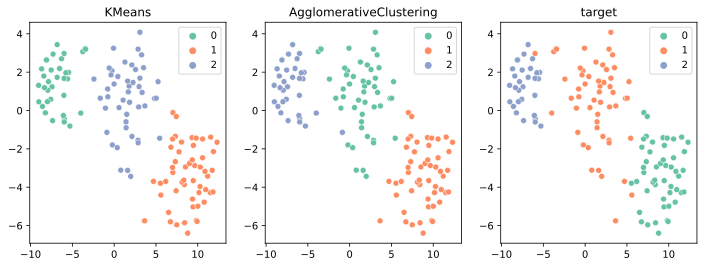

In [35]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)

sns.scatterplot(x=X_train_embedded[:, 0], y=X_train_embedded[:, 1], hue=kmeans_labels_train, palette='Set2', ax=axes[0]).set_title('KMeans')
sns.scatterplot(x=X_train_embedded[:, 0], y=X_train_embedded[:, 1], hue=ag_train_labels, palette='Set2', ax=axes[1]).set_title('AgglomerativeClustering')
sns.scatterplot(x=X_train_embedded[:, 0], y=X_train_embedded[:, 1], hue=y_train.values[:, 0], palette='Set2', ax=axes[2]).set_title('target')


<b>Вывод:</b> По графикам видно, что модель "AgglomerativeClustering" показала лучший результат кластеризации.

### *Задание 6

In [36]:
from sklearn.datasets import fetch_olivetti_faces 

In [37]:
olivetti = fetch_olivetti_faces()

In [38]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [39]:
X = pd.DataFrame(olivetti.data)
y = pd.DataFrame(olivetti.target)

In [40]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


In [41]:
log_reg = LogisticRegression()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [43]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
predictions = log_reg.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.925

In [46]:
pca = PCA(random_state=100)

In [47]:
pca.fit(X_train)
pca.explained_variance_ratio_

array([2.43043229e-01, 1.31855398e-01, 8.53825733e-02, 5.34161292e-02,
       3.56278121e-02, 3.23974229e-02, 2.49968059e-02, 2.08970159e-02,
       1.96348336e-02, 1.69984568e-02, 1.65523868e-02, 1.42302578e-02,
       1.29668731e-02, 1.17672160e-02, 1.07957684e-02, 1.01924287e-02,
       9.08993185e-03, 8.54258053e-03, 8.08282662e-03, 7.64086470e-03,
       7.28926854e-03, 6.77734334e-03, 6.09057862e-03, 5.96706662e-03,
       5.60390484e-03, 5.48549183e-03, 5.07779792e-03, 4.88746725e-03,
       4.65401821e-03, 4.48393356e-03, 4.12934087e-03, 3.91210057e-03,
       3.73931509e-03, 3.69064044e-03, 3.27773858e-03, 3.12469364e-03,
       3.06588016e-03, 3.02746310e-03, 2.83354498e-03, 2.74737831e-03,
       2.61309952e-03, 2.56076129e-03, 2.53762049e-03, 2.42585712e-03,
       2.37283087e-03, 2.34428723e-03, 2.27301684e-03, 2.21573585e-03,
       2.15464621e-03, 2.12109718e-03, 1.99189526e-03, 1.97633635e-03,
       1.89193094e-03, 1.82635768e-03, 1.79880008e-03, 1.73633685e-03,
      

In [48]:
len(pca.explained_variance_ratio_)

280

In [49]:
np.sum(pca.explained_variance_ratio_[:70])

0.91953903

In [50]:
pca = PCA(n_components=70, random_state=100)

In [51]:
pca.fit(X_train)
X_train_mc = pca.transform(X_train)
X_test_mc = pca.transform(X_test)

In [52]:
X_train_mc.shape

(280, 70)

In [53]:
X_train.shape

(280, 4096)

In [54]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_mc, y_train)
predictions_pca = log_reg_pca.predict(X_test_mc)

In [55]:
pca_accuracy = accuracy_score(y_test, predictions_pca)
pca_accuracy

0.925

In [56]:
print(f"Доля верных ответов модели LogisticRegression без PCA:{accuracy}\nДоля верных ответов модели LogisticRegression c PCA: {pca_accuracy}")

Доля верных ответов модели LogisticRegression без PCA:0.925
Доля верных ответов модели LogisticRegression c PCA: 0.925


<b>Вывод:</b> Понижение размерности методом главных компонент не приводит к уменшению доли верных ответов.